**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [8]:
netflix_subset = netflix_df[netflix_df['type'] == 'Movie']

In [31]:
cols = ["title", "country", "genre", "release_year", "duration"]
netflix_movies = netflix_subset[cols]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [65]:
# add a column for colors
netflix_movies['Colors'] = ''

for i, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        netflix_movies.loc[i, 'Colors'] = 'blue'
    elif row['genre'] == 'Documentaries':
        netflix_movies.loc[i, 'Colors'] = 'green'
    elif row['genre'] == 'Stand-Up':
        netflix_movies.loc[i, 'Colors'] = 'red'
    else:
        netflix_movies.loc[i, 'Colors'] = 'black'

netflix_movies.tail()

C:\Users\iamaj\AppData\Local\Temp\ipykernel_1472\453587930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['Colors'] = ''


,title,country,genre,release_year,duration,Colors
7781,Zoom,United States,Children,2006,88,blue
7782,Zozo,Sweden,Dramas,2005,99,black
7783,Zubaan,India,Dramas,2015,111,black
7784,Zulu Man in Japan,NaN,Documentaries,2019,44,green
7786,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,United Kingdom,Documentaries,2019,90,green


In [66]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head()

,title,country,genre,release_year,duration,Colors
35,#Rucker50,United States,Documentaries,2016,56,green
55,100 Things to do Before High School,United States,Uncategorized,2014,44,black
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37,black
101,3 Seconds Divorce,Canada,Documentaries,2018,53,green
146,A 3 Minute Hug,Mexico,Documentaries,2019,28,green


In [67]:
short_movies['genre'].value_counts()

genre
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: count, dtype: int64

In [68]:
short_movies['country'].value_counts()

country
United States     219
United Kingdom     45
Canada             22
Mexico             12
Japan               9
India               8
France              7
Germany             3
Australia           3
Brazil              3
Ireland             2
Spain               2
Netherlands         2
Italy               2
Argentina           2
Georgia             1
South Africa        1
Pakistan            1
Colombia            1
Israel              1
Sweden              1
Iceland             1
Denmark             1
Poland              1
Norway              1
Czech Republic      1
Namibia             1
South Korea         1
Name: count, dtype: int64

In [69]:
short_movies.head()

,title,country,genre,release_year,duration,Colors
35,#Rucker50,United States,Documentaries,2016,56,green
55,100 Things to do Before High School,United States,Uncategorized,2014,44,black
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37,black
101,3 Seconds Divorce,Canada,Documentaries,2018,53,green
146,A 3 Minute Hug,Mexico,Documentaries,2019,28,green


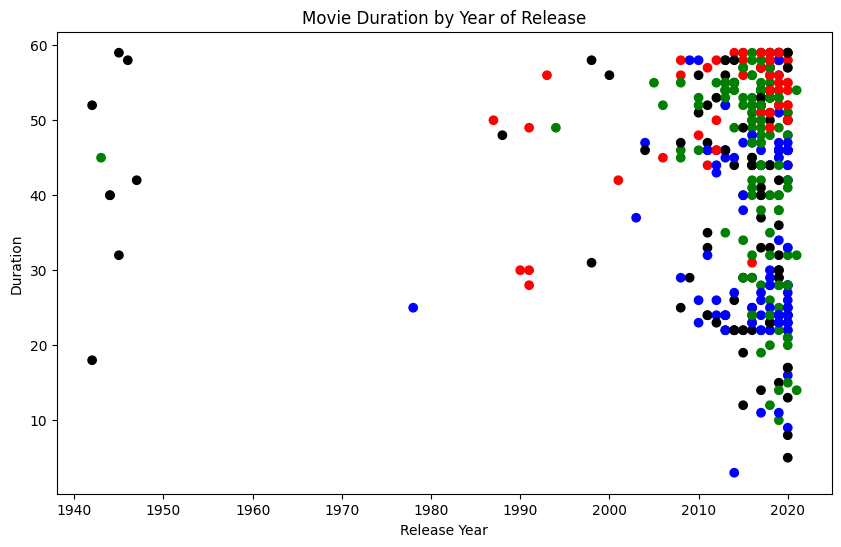

In [70]:
# Visualize the data for short movies

fig = plt.figure(figsize=(10, 6))

plt.scatter(short_movies['release_year'], short_movies['duration'], c=short_movies['Colors'])
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Movie Duration by Year of Release')
plt.show()

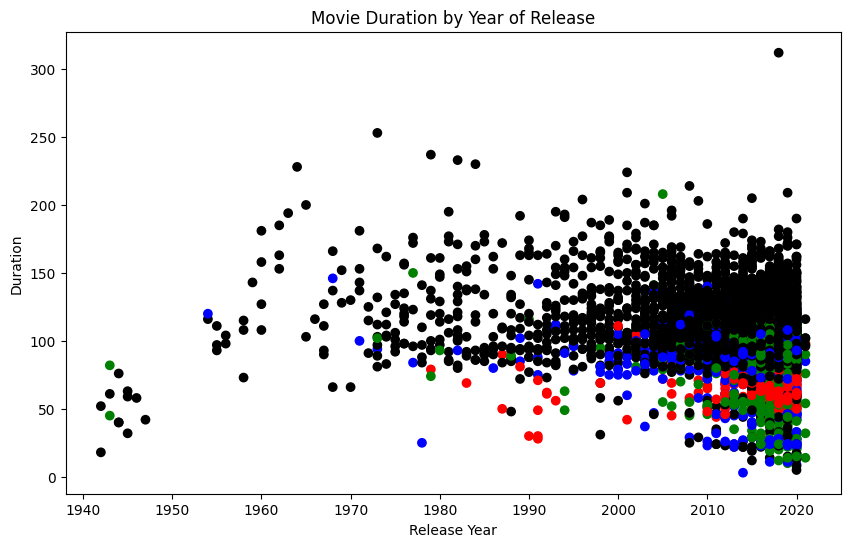

In [72]:
# Visualize the data for all movies

fig = plt.figure(figsize=(10, 6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=netflix_movies['Colors'])
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Movie Duration by Year of Release')
plt.show()

##### **From the Data Now We Can see that movies may or may not gettin shorter. But the average duration of movies is 99.307978 minutes.**